In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('data/titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Histogram von Feature 'Age'

In [33]:
age_without_nan = train['Age'][~np.isnan(train['Age'])]
print(len(age_without_nan))
age_with_nan = train['Age'].replace(np.nan, -30)
print(len(age_with_nan))

714
891


(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

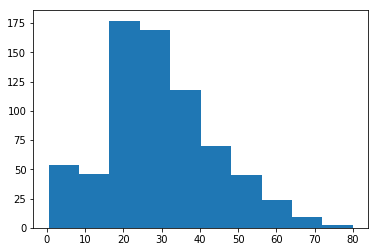

In [73]:
plt.hist(age_without_nan)

(array([ 177.,    0.,    0.,    0.,    0.,   24.,   30.,   17.,   93.,
         114.,  131.,   88.,   75.,   44.,   47.,   18.,   20.,    6.,
           6.,    1.]),
 array([-30. , -24.5, -19. , -13.5,  -8. ,  -2.5,   3. ,   8.5,  14. ,
         19.5,  25. ,  30.5,  36. ,  41.5,  47. ,  52.5,  58. ,  63.5,
         69. ,  74.5,  80. ]),
 <a list of 20 Patch objects>)

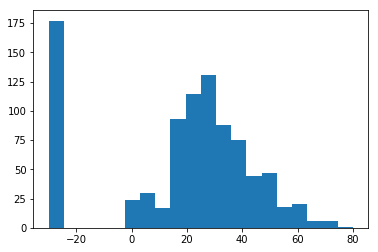

In [74]:
plt.hist(age_with_nan, bins=20)

## Histogram von Feature 'Sex'

In [75]:
sex_without_nan = train['Sex'][~np.isnan(train['Sex'])]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [76]:
train['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [77]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
sex_encoded = pd.Series(le.fit_transform(train['Sex']))
#le.fit_transform(train['Sex'].unique())

In [78]:
sex_encoded.head()

0    1
1    0
2    0
3    0
4    1
dtype: int64

(array([ 314.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  577.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

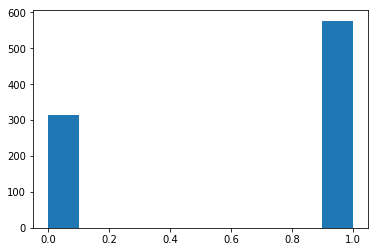

In [80]:
plt.hist(sex_encoded)

In [81]:
len(train[train['Sex'] == 'male'])

577

## Feature pair 'Age' and 'Sex'

In [82]:
age_with_nan
sex_encoded
y = train['Survived']
len(age_with_nan) == len(sex_encoded) == len(y)

True

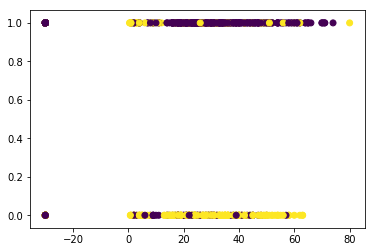

In [83]:
plt.scatter(age_with_nan, sex_encoded, c=y)
plt.show()

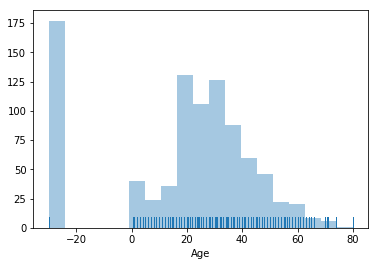

In [84]:
sns.distplot(age_with_nan, kde=False, rug=True)

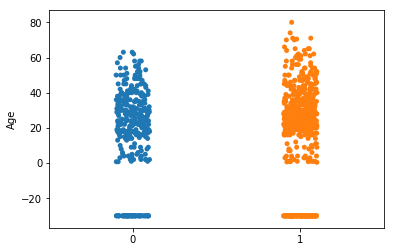

In [93]:
 sns.stripplot(x=sex_encoded, y=age_with_nan, jitter=True)

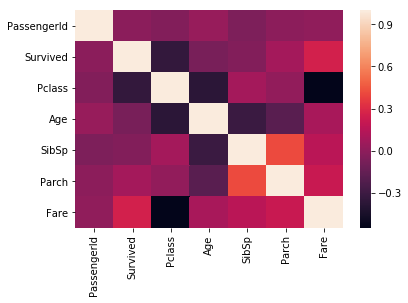

In [99]:
corr = train.corr()
sns.heatmap(corr);

In [95]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
